<a href="https://colab.research.google.com/github/VijayaBhargavi198/Customer-segmentation/blob/main/research_project_execution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading the dataset from kaggle**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [ ]:
#reading the dataset as CSV file, dataset is taken from kaggle
customers_df = pd.read_csv('Mall_Customers.csv')

# **EDA-Exploratory Data Analysis**

In [ ]:
#Finding the shape of the dataset, i.e columns and rows
customers_df.shape

(200, 5)

In [ ]:
# What are the columns included in this dataset?
customers_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# What is the basic information you can retrieve from the dataset?
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Get the top 5 rows of the dataset to observe how the data is in the dataset
print(customers_df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# dataset description of numeric columns 
customers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc13499a10>,
      dtype=object)

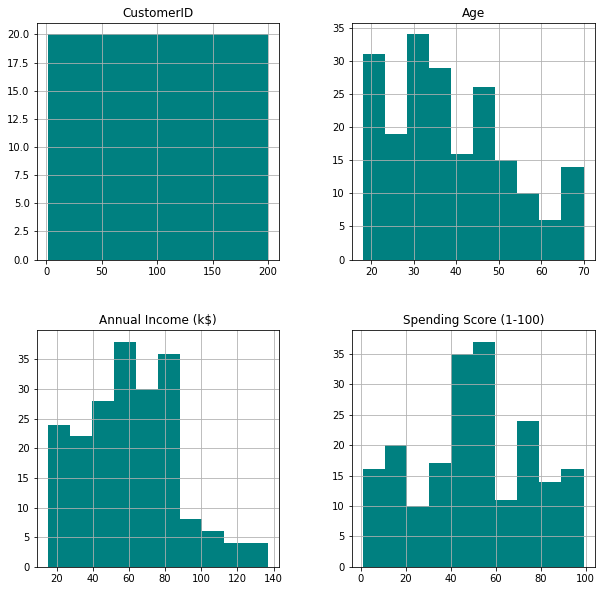

In [ ]:
#How is the data distributed in the dataset?
%matplotlib inline
customers_df.hist(figsize=(10,10), color='teal')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


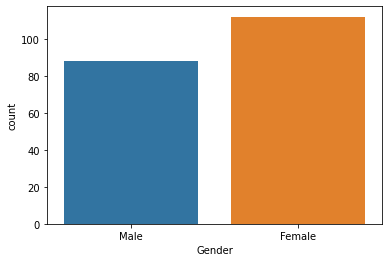

In [ ]:
#trying to find out how gender is distributed in the dataset
import seaborn as sns
sns.countplot(customers_df['Gender'],label="Count")

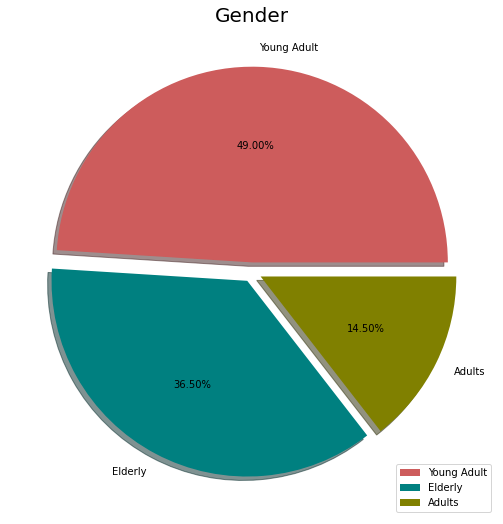

In [ ]:
# age dristribution over the dataset
customers_lst = [customers_df]
temp_df=customers_df
for column in customers_lst:
    column.loc[(column['Age'] >= 18) & (column['Age'] <= 35), 'age_category'] = 'Young Adult'
    column.loc[(column['Age'] > 35) & (column['Age'] <= 55), 'age_category'] = 'Adults'
    column.loc[column['Age'] > 55, 'age_category'] = 'Elderly'
labels = temp_df["age_category"].unique().tolist()
size = temp_df["age_category"].value_counts().tolist()
colors = ["indianred", "teal", "olive"]
explode = (0.05, 0.05, 0.05)

pyplot.rcParams['figure.figsize'] = (9, 9)
pyplot.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
pyplot.title('Gender', fontsize = 20)
pyplot.axis('off')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


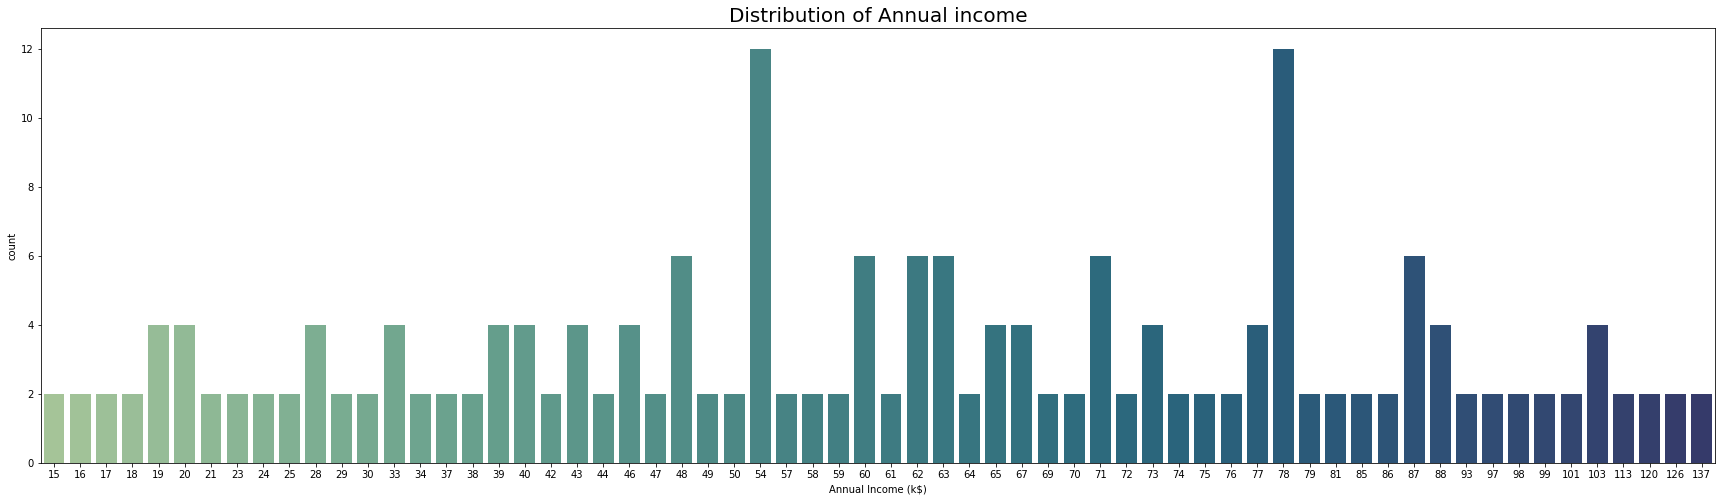

In [ ]:
# distibution of income 
pyplot.rcParams['figure.figsize'] = (30, 8)
sns.countplot(customers_df['Annual Income (k$)'], palette = 'crest')
pyplot.title('Distribution of Annual income', fontsize = 20)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


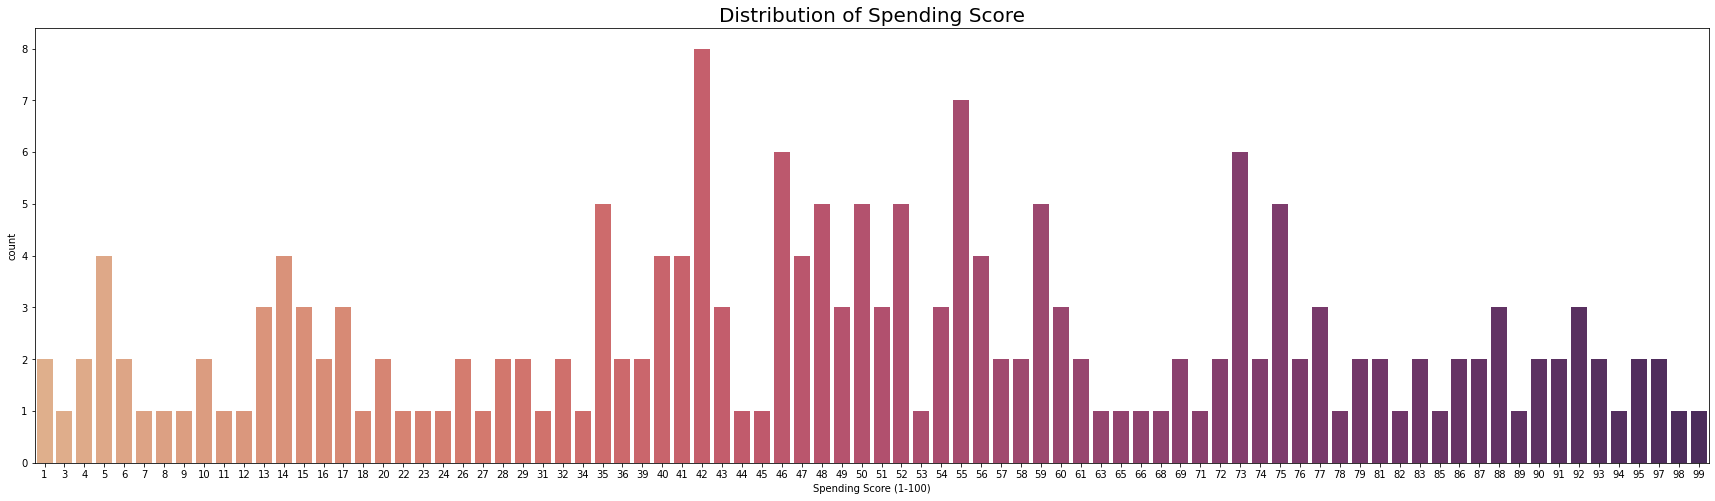

In [ ]:
# distibution of Spending Score
pyplot.rcParams['figure.figsize'] = (30, 8)
sns.countplot(customers_df['Spending Score (1-100)'], palette = 'flare')
pyplot.title('Distribution of Spending Score', fontsize = 20)
pyplot.show()

# **Data preprocessing and Data wrangling**

In [ ]:
#finding missing values or null values
print(customers_df.isnull().sum()) 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
age_category              0
dtype: int64


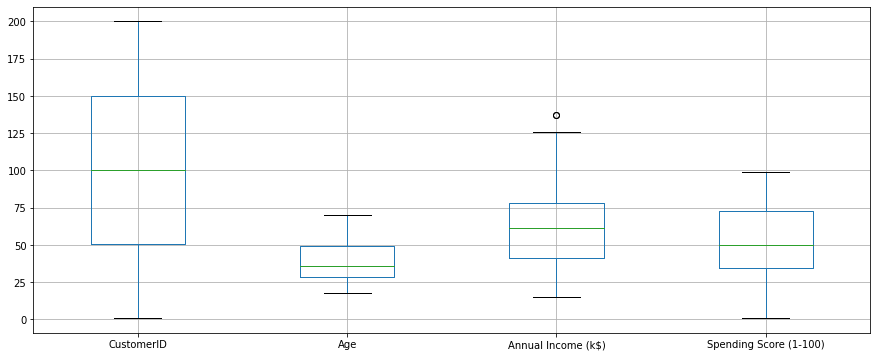

In [ ]:
#outliers check
%matplotlib inline
customers_df.boxplot(figsize=(15,6))

# **Clustering Algorithms**

**K-Means**

Text(0, 0.5, 'Squared Loss.')

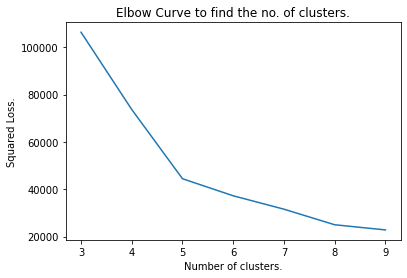

In [ ]:
from sklearn.cluster import KMeans
number_of_clusters = [x for x in range(3, 10)]
squared_errors = []
cluster_data = customers_df.iloc[:, [3, 4]].values
for cluster in number_of_clusters:
    kmeans = KMeans(n_clusters = cluster).fit(cluster_data)
    squared_errors.append(kmeans.inertia_)
pyplot.plot(number_of_clusters, squared_errors)
pyplot.title("Elbow Curve to find the no. of clusters.")
pyplot.xlabel("Number of clusters.")
pyplot.ylabel("Squared Loss.")


In [ ]:
#now from above we can obtain the best or optimal K value
#Apply the k means clustering with optimal k 
km =  KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmodel= km.fit_predict(cluster_data)

customers_df["K_clusters"] = kmodel
print(customers_df.head())

   CustomerID  Gender  Age  ...  Spending Score (1-100)  age_category K_clusters
0           1    Male   19  ...                      39   Young Adult          3
1           2    Male   21  ...                      81   Young Adult          1
2           3  Female   20  ...                       6   Young Adult          3
3           4  Female   23  ...                      77   Young Adult          1
4           5  Female   31  ...                      40   Young Adult          3

[5 rows x 7 columns]


###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less


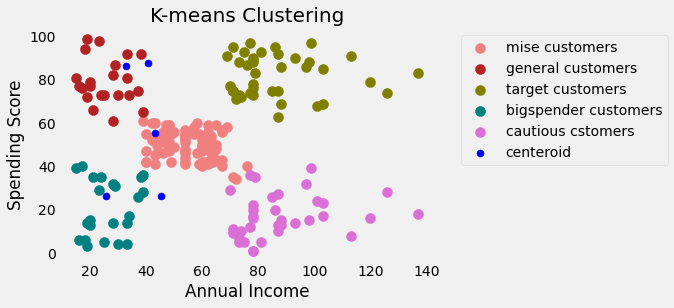

In [ ]:
pyplot.scatter(cluster_data[kmodel == 0, 0], cluster_data[kmodel == 0, 1], s = 100, c = 'Lightcoral', label = 'mise customers')
pyplot.scatter(cluster_data[kmodel == 1, 0], cluster_data[kmodel == 1, 1], s = 100, c = 'firebrick', label = 'general customers')
pyplot.scatter(cluster_data[kmodel == 2, 0], cluster_data[kmodel == 2, 1], s = 100, c = 'olive', label = 'target customers')
pyplot.scatter(cluster_data[kmodel == 3, 0], cluster_data[kmodel == 3, 1], s = 100, c = 'teal', label = 'bigspender customers')
pyplot.scatter(cluster_data[kmodel == 4, 0], cluster_data[kmodel == 4, 1], s = 100, c = 'orchid', label = 'cautious cstomers')
pyplot.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

pyplot.style.use('fivethirtyeight')
pyplot.title('K-means Clustering', fontsize = 20)
pyplot.xlabel('Annual Income')
pyplot.ylabel('Spending Score')
pyplot.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
pyplot.grid()
pyplot.show()

**Hierarchial method**

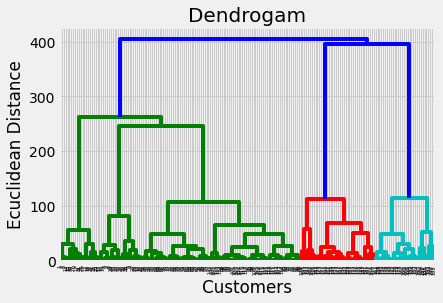

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendrogram = hierarchy.dendrogram(hierarchy.linkage(cluster_data,method='ward'))
pyplot.title('Dendrogam', fontsize = 20)
pyplot.xlabel('Customers')
pyplot.ylabel('Ecuclidean Distance')
pyplot.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hmodel = hc.fit_predict(cluster_data)
customers_df["h_clusters"] = hmodel
print(customers_df.head())

   CustomerID  Gender  Age  ...  DB_clusters  K2_clusters K3_clusters
0           1    Male   19  ...           -1            0           0
1           2    Male   21  ...           -1            1           4
2           3  Female   20  ...           -1            2           0
3           4  Female   23  ...           -1            1           4
4           5  Female   31  ...           -1            0           0

[5 rows x 11 columns]


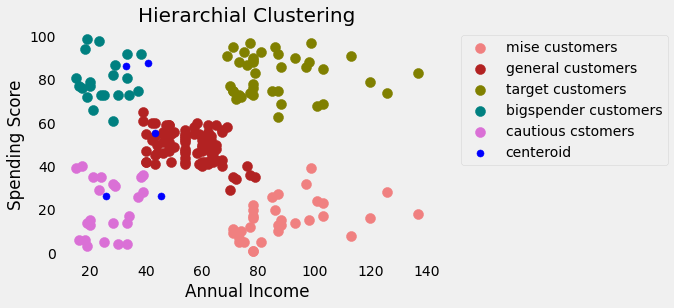

In [ ]:

pyplot.scatter(cluster_data[hmodel == 0, 0], cluster_data[hmodel == 0, 1], s = 100, c = 'Lightcoral', label = 'mise customers')
pyplot.scatter(cluster_data[hmodel == 1, 0], cluster_data[hmodel == 1, 1], s = 100, c = 'firebrick', label = 'general customers')
pyplot.scatter(cluster_data[hmodel == 2, 0], cluster_data[hmodel == 2, 1], s = 100, c = 'olive', label = 'target customers')
pyplot.scatter(cluster_data[hmodel == 3, 0], cluster_data[hmodel == 3, 1], s = 100, c = 'teal', label = 'bigspender customers')
pyplot.scatter(cluster_data[hmodel == 4, 0], cluster_data[hmodel == 4, 1], s = 100, c = 'orchid', label = 'cautious cstomers')
pyplot.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

pyplot.style.use('fivethirtyeight')
pyplot.title('Hierarchical Clustering', fontsize = 20)
pyplot.xlabel('Annual Income')
pyplot.ylabel('Spending Score')
pyplot.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
pyplot.grid()
pyplot.show()

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
db_model=db.fit(cluster_data)
label=db_model.labels_
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
customers_df["DB_clusters"] = label
customers_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_category,DB_clusters
0,1,Male,19,15,39,Young Adult,-1
1,2,Male,21,15,81,Young Adult,-1
2,3,Female,20,16,6,Young Adult,-1
3,4,Female,23,16,77,Young Adult,-1
4,5,Female,31,17,40,Young Adult,-1


In [ ]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
#Calculating the number of clusters
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


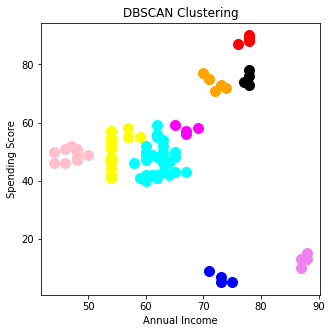

In [ ]:
db_cluster = db.fit_predict(cluster_data)
pyplot.figure(figsize=(5,5))
pyplot.scatter(cluster_data[db_cluster == 0, 0], cluster_data[db_cluster == 0, 1], s = 100, c = 'pink')
pyplot.scatter(cluster_data[db_cluster == 1, 0], cluster_data[db_cluster == 1, 1], s = 100, c = 'yellow')
pyplot.scatter(cluster_data[db_cluster == 2, 0], cluster_data[db_cluster == 2, 1], s = 100, c = 'cyan')
pyplot.scatter(cluster_data[db_cluster == 3, 0], cluster_data[db_cluster == 3, 1], s = 100, c = 'magenta')
pyplot.scatter(cluster_data[db_cluster == 4, 0], cluster_data[db_cluster == 4, 1], s = 100, c = 'orange')
pyplot.scatter(cluster_data[db_cluster == 5, 0], cluster_data[db_cluster == 5, 1], s = 100, c = 'blue')
pyplot.scatter(cluster_data[db_cluster == 6, 0], cluster_data[db_cluster == 6, 1], s = 100, c = 'red')
pyplot.scatter(cluster_data[db_cluster == 7, 0], cluster_data[db_cluster == 7, 1], s = 100, c = 'black')
pyplot.scatter(cluster_data[db_cluster == 8, 0], cluster_data[db_cluster == 8, 1], s = 100, c = 'violet')
pyplot.xlabel('Annual Income')
pyplot.ylabel('Spending Score')
pyplot.title('DBSCAN Clustering')
pyplot.show()

# **Kmeans for Age**

Text(0, 0.5, 'Squared Loss.')

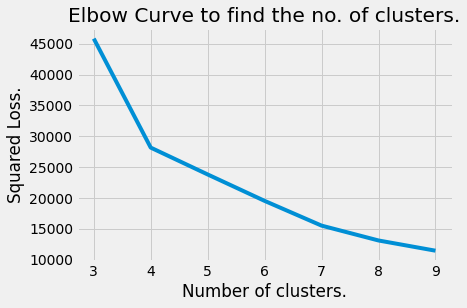

In [ ]:
 from sklearn.cluster import KMeans
number_of_clusters = [x for x in range(3, 10)]
squared_errors = []
cluster_data2 = customers_df.iloc[:, [2, 4]].values
for cluster in number_of_clusters:
    kmeans = KMeans(n_clusters = cluster).fit(cluster_data2)
    squared_errors.append(kmeans.inertia_)
optimal_clusters = np.argmin(squared_errors) + 2 
pyplot.plot(number_of_clusters, squared_errors)
pyplot.title("Elbow Curve to find the no. of clusters.")
pyplot.xlabel("Number of clusters.")
pyplot.ylabel("Squared Loss.")
  

In [ ]:
#now from above we can obtain the best or optimal K value
#Apply the k means clustering with optimal k 
km =  KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmodel1= km.fit_predict(cluster_data2)

customers_df["K2_clusters"] = kmodel1
print(customers_df.head())

   CustomerID  Gender  Age  ...  h_clusters  DB_clusters K2_clusters
0           1    Male   19  ...           4           -1           0
1           2    Male   21  ...           3           -1           1
2           3  Female   20  ...           4           -1           2
3           4  Female   23  ...           3           -1           1
4           5  Female   31  ...           4           -1           0

[5 rows x 10 columns]


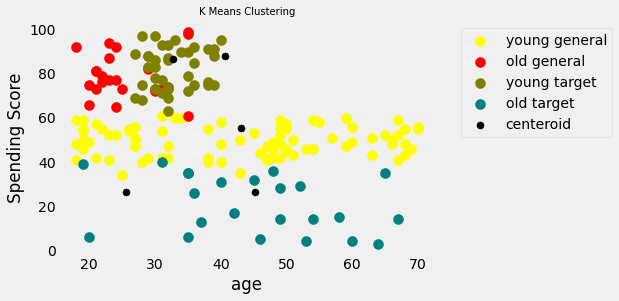

In [ ]:
pyplot.scatter(cluster_data2[kmodel == 0, 0], cluster_data2[kmodel == 0, 1], s = 100, c = 'yellow', label = 'young general')
pyplot.scatter(cluster_data2[kmodel == 1, 0], cluster_data2[kmodel == 1, 1], s = 100, c = 'red', label = 'old general')
pyplot.scatter(cluster_data2[kmodel == 2, 0], cluster_data2[kmodel == 2, 1], s = 100, c = 'olive', label = 'young target')
pyplot.scatter(cluster_data2[kmodel == 3, 0], cluster_data2[kmodel == 3, 1], s = 100, c = 'teal', label = 'old target')
pyplot.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

pyplot.title('K Means Clustering', fontsize = 10)
pyplot.xlabel('age')
pyplot.ylabel('Spending Score')
pyplot.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
pyplot.grid()
pyplot.show()

# **Kmeans for all three attributes**

Text(0, 0.5, 'Squared Loss.')

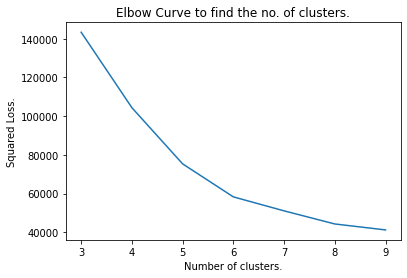

In [ ]:
from sklearn.cluster import KMeans
number_of_clusters = [x for x in range(3, 10)]
squared_errors = []
cluster_data3 = customers_df[['Age','Annual Income (k$)','Spending Score (1-100)']]
for cluster in number_of_clusters:
    kmeans = KMeans(n_clusters = cluster).fit(cluster_data3)
    squared_errors.append(kmeans.inertia_)
optimal_clusters = np.argmin(squared_errors) + 2 
pyplot.plot(number_of_clusters, squared_errors)
pyplot.title("Elbow Curve to find the no. of clusters.")
pyplot.xlabel("Number of clusters.")
pyplot.ylabel("Squared Loss.")

In [ ]:
#now from above we can obtain the best or optimal K value
#Apply the k means clustering with optimal k 
km =  KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmodel2= km.fit_predict(cluster_data3)

customers_df["K3_clusters"] = kmodel2
print(customers_df.head())

   CustomerID  Gender  ...  Spending Score (1-100)  K3_clusters
0           1    Male  ...                      39            0
1           2    Male  ...                      81            4
2           3  Female  ...                       6            0
3           4  Female  ...                      77            4
4           5  Female  ...                      40            0

[5 rows x 6 columns]


In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

customers_df["K3_clusters"] = kmodel2
plot1 = go.Scatter3d(
    x= cluster_data3['Age'],
    y= cluster_data3['Spending Score (1-100)'],
    z= cluster_data3['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = customers_df["K3_clusters"], 
        size= 10,
        line=dict(
            color= customers_df["K3_clusters"],
            width= 12
        ),
        opacity=1
     )
)
plot_df = [plot1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = plot_df, layout = layout)
iplot(fig)